In [40]:
import os

import numpy as np
import pandas as pd

import matplotlib
import matplotlib.pyplot as plt

In [23]:
def make_route(src, tgt):
    if not os.path.isdir(src): 
        return "Invalid directory or the directory is not exist"
    route = os.path.join(src, tgt)
    return route

In [18]:
u_cols = ['UserID', 'Gender', 'Age', 'Occupation', 'Zip-code']
m_cols = ['MovieID','Title', 'Genres']
r_cols = ['UserID', 'MovieID', 'Rating', 'Timestamp']

In [30]:
movies_df = pd.read_table(make_route('dataset', 'movies.dat'), names=m_cols, sep='::', encoding='latin-1', engine='python')
ratings_df = pd.read_csv(make_route('dataset', 'ratings.dat'), names=r_cols, sep='::', encoding='latin-1', engine='python')
users_df = pd.read_csv(make_route('dataset', 'users.dat'), names=u_cols, sep='::', encoding='latin-1', engine='python')

In [31]:
# movies_df.to_csv(make_route('dataset', 'movies.csv'))
# ratings_df.to_csv(make_route('dataset', 'ratings.csv'))
# users_df.to_csv(make_route('dataset', 'users.csv'))

# Ratings

In [32]:
ratings_df.head()

,UserID,MovieID,Rating,Timestamp
0,1,1193,5,978300760
1,1,661,3,978302109
2,1,914,3,978301968
3,1,3408,4,978300275
4,1,2355,5,978824291


In [33]:
ratings_df['UserID'].value_counts()

UserID
4169    2314
1680    1850
4277    1743
1941    1595
1181    1521
        ... 
5725      20
3407      20
1664      20
4419      20
3021      20
Name: count, Length: 6040, dtype: int64

In [51]:
ratings_df['MovieID'].value_counts()

MovieID
2858    3428
260     2991
1196    2990
1210    2883
480     2672
        ... 
3458       1
2226       1
1815       1
398        1
2909       1
Name: count, Length: 3706, dtype: int64

Text(0, 0.5, 'Number of viewers')

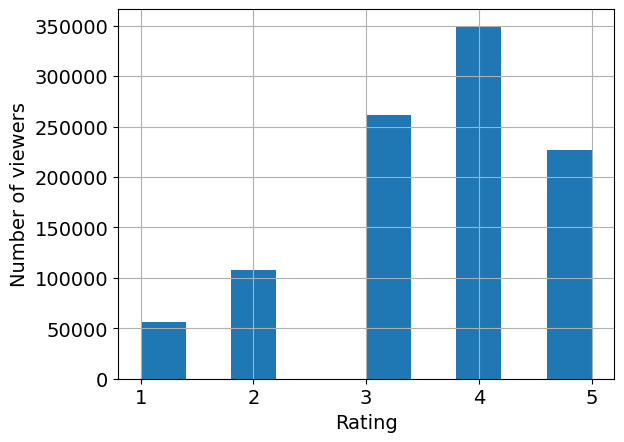

In [53]:
ratings_df['Rating'].hist()
plt.xlabel('Rating')
plt.ylabel('Number of viewers')

# Users

In [36]:
users_df.head()

,UserID,Gender,Age,Occupation,Zip-code
0,1,F,1,10,48067
1,2,M,56,16,70072
2,3,M,25,15,55117
3,4,M,45,7,02460
4,5,M,25,20,55455


In [61]:
users_df['Gender'].value_counts()

Gender
M    4331
F    1709
Name: count, dtype: int64

Text(0.5, 1.0, 'Number of people within an age group')

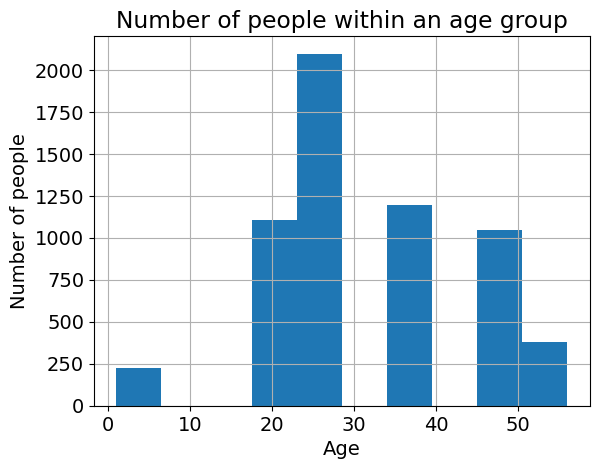

In [62]:
users_df['Age'].hist()
plt.xlabel('Age')
plt.ylabel('Number of people')
plt.title('Number of people within an age group')

In [ ]:
age_dict = {
    1:  "Under 18",
	18:  "18-24",
	25:  "25-34",
	35:  "35-44",
	45:  "45-49",
	50:  "50-55",
	56:  "56+"
}

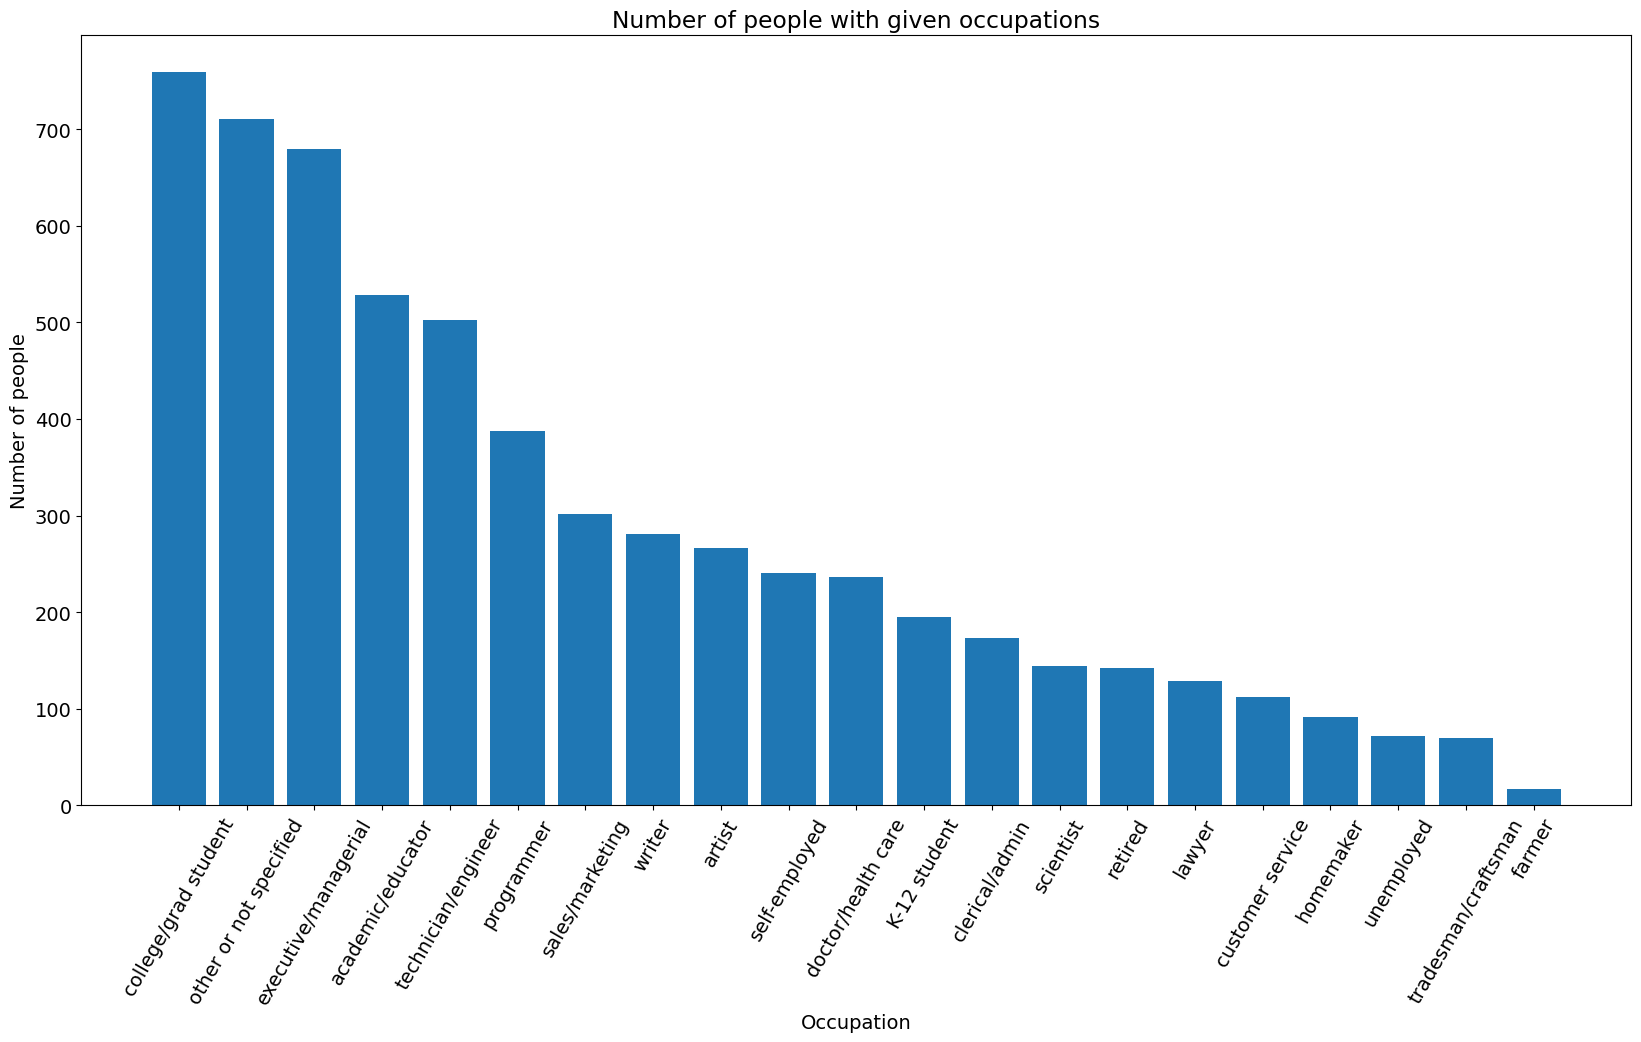

In [58]:
occupation_mapping = {
    0: "other or not specified",
    1: "academic/educator",
    2: "artist",
    3: "clerical/admin",
    4: "college/grad student",
    5: "customer service",
    6: "doctor/health care",
    7: "executive/managerial",
    8: "farmer",
    9: "homemaker",
    10: "K-12 student",
    11: "lawyer",
    12: "programmer",
    13: "retired",
    14: "sales/marketing",
    15: "scientist",
    16: "self-employed",
    17: "technician/engineer",
    18: "tradesman/craftsman",
    19: "unemployed",
    20: "writer",
}

occupation_id_count = users_df["Occupation"].value_counts().to_dict()
occupation_count = {
    occupation_mapping[id]: count for id, count in occupation_id_count.items()
}


matplotlib.rcParams.update({"font.size": 14})
plt.figure(figsize=(20, 10))
plt.bar(x=occupation_count.keys(), height=occupation_count.values())
plt.xticks(rotation=60)
plt.xlabel('Occupation')
plt.ylabel('Number of people')
plt.title('Number of people with given occupations')
plt.show()

# Movies

In [45]:
movies_df.head()

,MovieID,Title,Genres
0,1,Toy Story (1995),Animation|Children's|Comedy
1,2,Jumanji (1995),Adventure|Children's|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama
4,5,Father of the Bride Part II (1995),Comedy


In [47]:
movies_df["num_genres"] = movies_df["Genres"].apply(lambda x: len(x.split('|')))
movies_df["num_genres"].value_counts()

num_genres
1    2025
2    1322
3     421
4     100
5      14
6       1
Name: count, dtype: int64

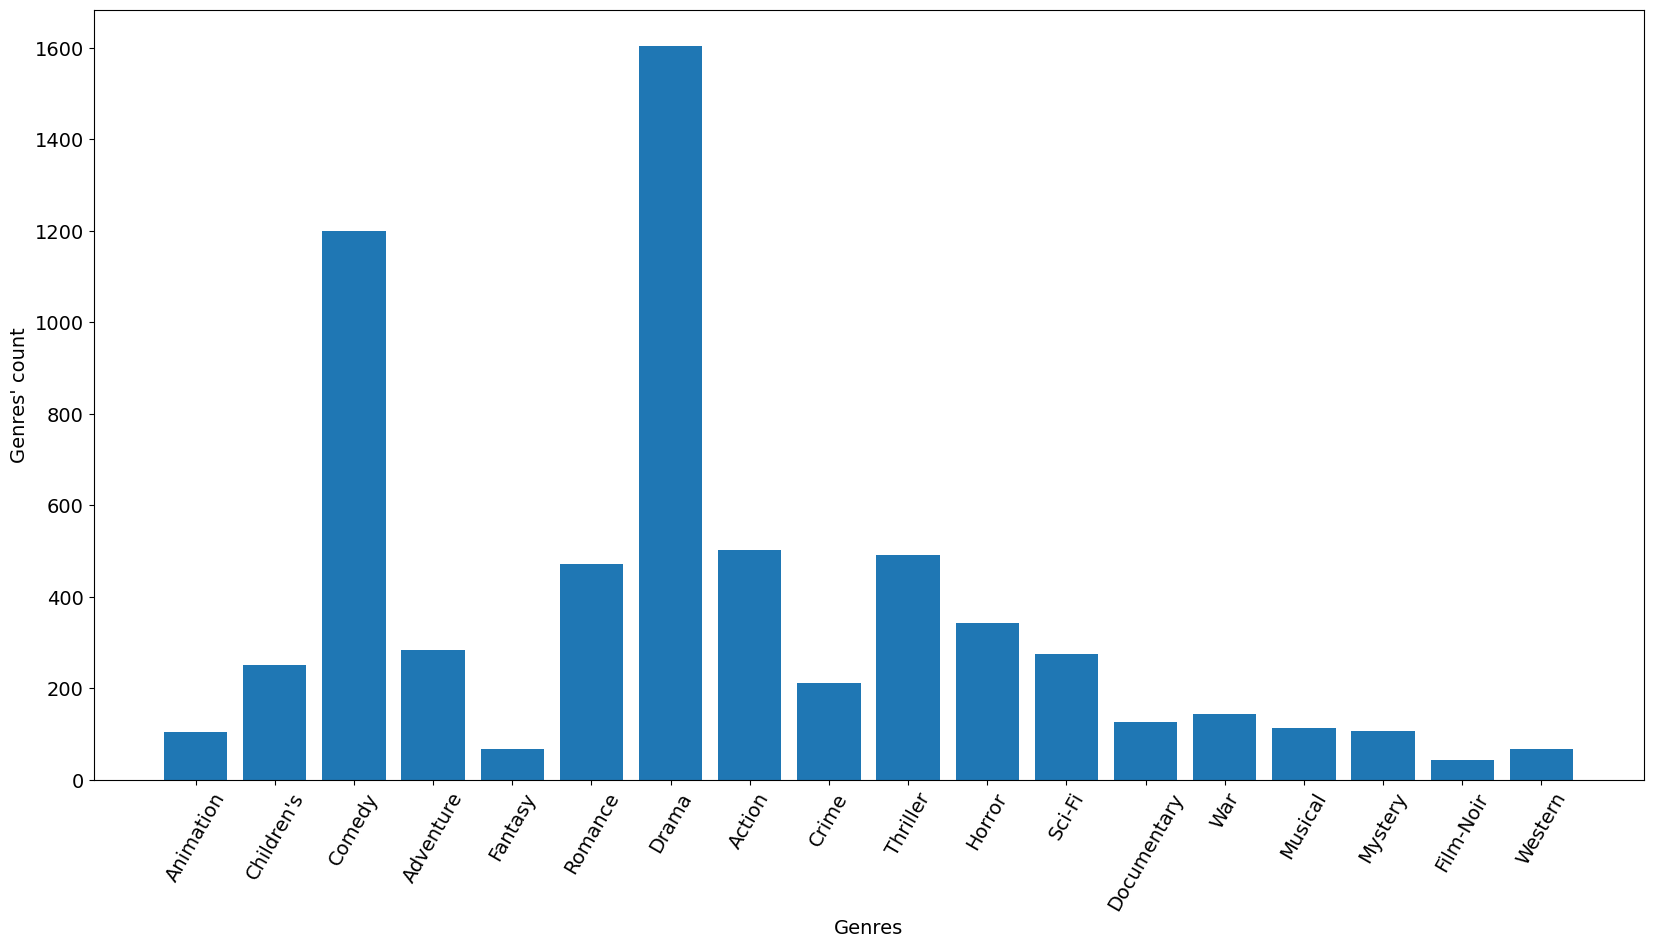

In [59]:
from collections import defaultdict

genres_counter = defaultdict(int)
for genre_str in movies_df["Genres"]:
    genres = genre_str.split('|')
    for genre in genres:
        genres_counter[genre] += 1
        
plt.figure(figsize=(20, 10))
plt.bar(x=genres_counter.keys(), height=genres_counter.values())
plt.xticks(rotation=60)
plt.xlabel('Genres')
plt.ylabel('Genres\' count')
plt.show()

# Master: Merge all

In [68]:
master_df = pd.merge(users_df, ratings_df, on='UserID', how='left')
master_df = pd.merge(master_df, movies_df, on='MovieID', how='left')
master_df = master_df.drop(columns=['Timestamp', 'Zip-code'])
master_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000209 entries, 0 to 1000208
Data columns (total 9 columns):
 #   Column      Non-Null Count    Dtype 
---  ------      --------------    ----- 
 0   UserID      1000209 non-null  int64 
 1   Gender      1000209 non-null  object
 2   Age         1000209 non-null  int64 
 3   Occupation  1000209 non-null  int64 
 4   MovieID     1000209 non-null  int64 
 5   Rating      1000209 non-null  int64 
 6   Title       1000209 non-null  object
 7   Genres      1000209 non-null  object
 8   num_genres  1000209 non-null  int64 
dtypes: int64(6), object(3)
memory usage: 68.7+ MB


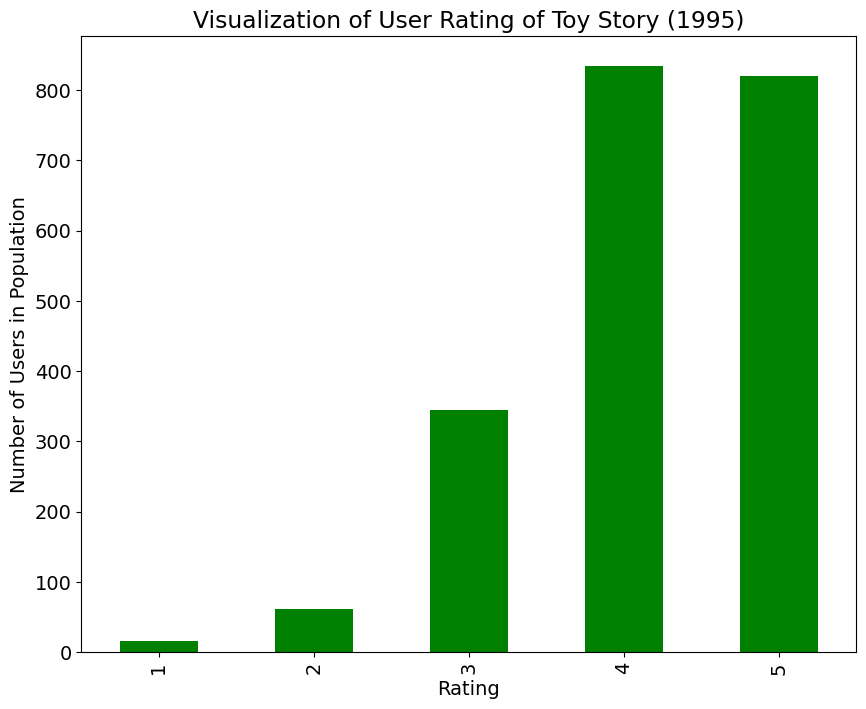

In [73]:
# Retreive Rating by UserID according to file's name
name = 'Toy Story (1995)'
# master_df[master_df.Title == name].groupby('Rating')['UserID'].count()
master_df[master_df.Title == name].groupby('Rating')['UserID'].count()\
                                                                .plot(kind='bar', 
                                                                      color='green', 
                                                                      figsize=(10, 8))

plt.xlabel('Rating')
plt.ylabel('Number of Users in Population')
plt.title(f'Visualization of User Rating of {name}')
plt.show()

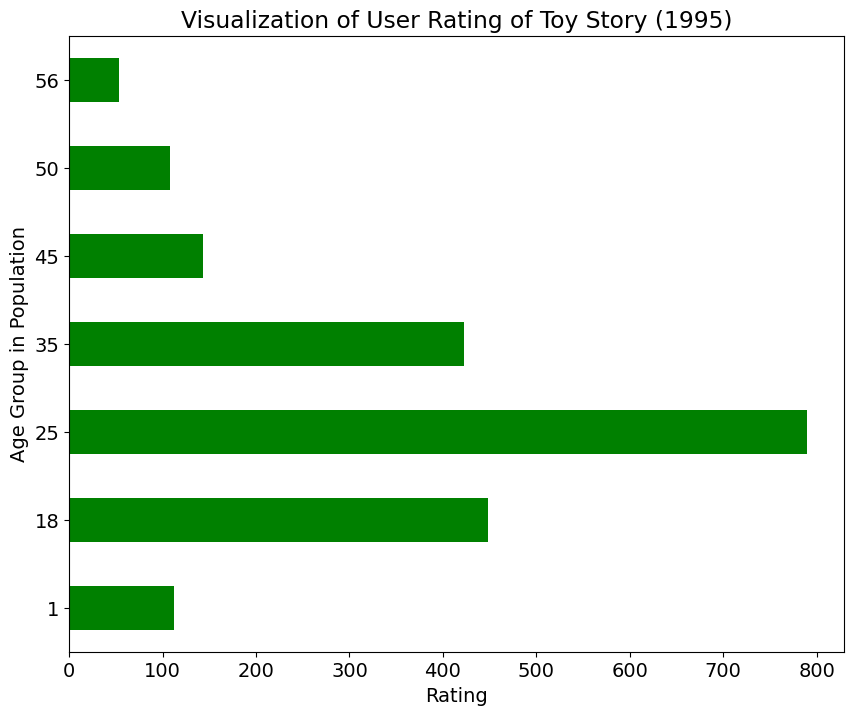

In [77]:
#Toy Story Movie Rating Analysis based upon Rating & MovieID
name = 'Toy Story (1995)'
# master_df[master_df.Title == name].groupby('Age')['MovieID'].count()
master_df[master_df.Title == name].groupby('Age')['MovieID'].count()\
                                                                .plot(kind='barh', 
                                                                      color='green', 
                                                                      figsize=(10, 8))

plt.xlabel('Rating')
plt.ylabel('Age Group in Population')
plt.title(f'Visualization of User Rating of {name}')
plt.show()

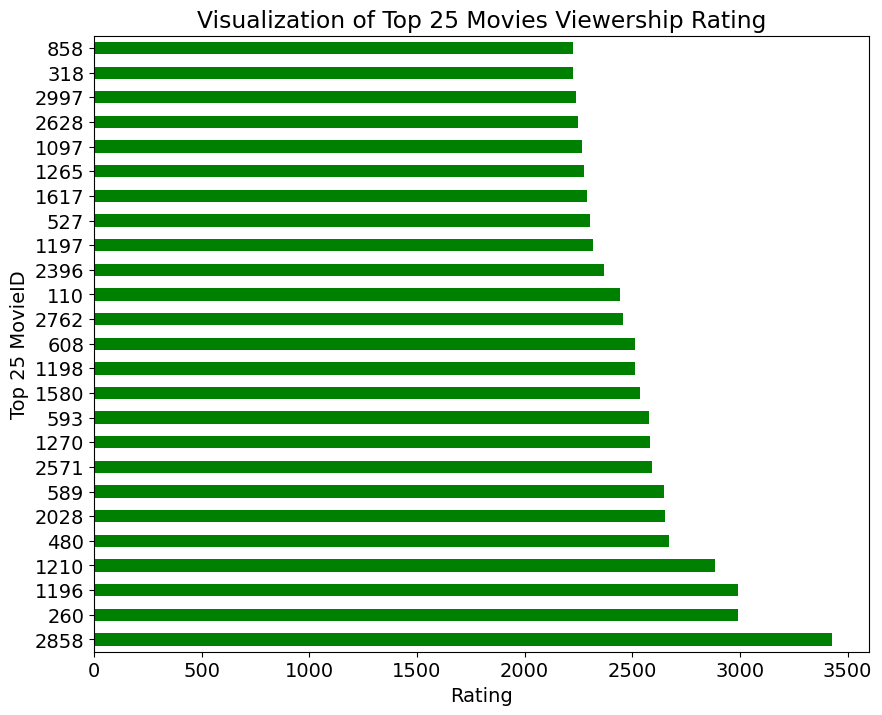

In [81]:
# Top 25 movies by viewership rating 

# master_df.groupby('MovieID')['Rating'].count()\
#                                         .sort_values(ascending=False)[: 25]

# master_df.groupby('MovieID')['Rating'].count()\
#                                         .nlargest(25)

master_df.groupby('MovieID')['Rating'].count()\
                                        .sort_values(ascending=False)[: 25]\
                                        .plot(kind='barh',
                                              color='g',  
                                              figsize=(10, 8))
plt.xlabel('Rating')
plt.ylabel('Top 25 MovieID')
plt.title('Visualization of Top 25 Movies Viewership Rating')
plt.show()

<Axes: ylabel='Rating'>

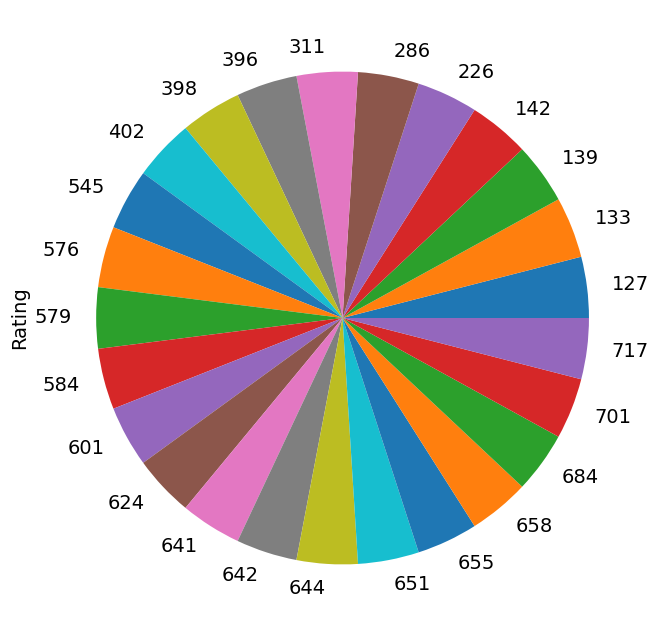

In [82]:
# Least 25 movies by viewership rating

# master_df.groupby('MovieID')['Rating'].count().nsmallest(25)
master_df.groupby('MovieID')['Rating'].count().nsmallest(25)\
                                                .plot(kind='pie', 
                                                      figsize=(10, 8))

In [84]:
# Find the ratings for all the movies reviewed by for a particular user of user id
user_id = 1280
user_info = master_df[master_df['UserID'] == user_id]
user_info.head()

,UserID,Gender,Age,Occupation,MovieID,Rating,Title,Genres,num_genres
209648,1280,M,1,10,3793,3,X-Men (2000),Action|Sci-Fi,2
209649,1280,M,1,10,3798,4,What Lies Beneath (2000),Thriller,1
209650,1280,M,1,10,2997,4,Being John Malkovich (1999),Comedy,1
209651,1280,M,1,10,589,5,Terminator 2: Judgment Day (1991),Action|Sci-Fi|Thriller,3
209652,1280,M,1,10,1,5,Toy Story (1995),Animation|Children's|Comedy,3


In [85]:
master_df[master_df['UserID'] == user_id].groupby('Rating')['MovieID'].count()

Rating
1     4
2     5
3     9
4    15
5    17
Name: MovieID, dtype: int64

<Axes: ylabel='MovieID'>

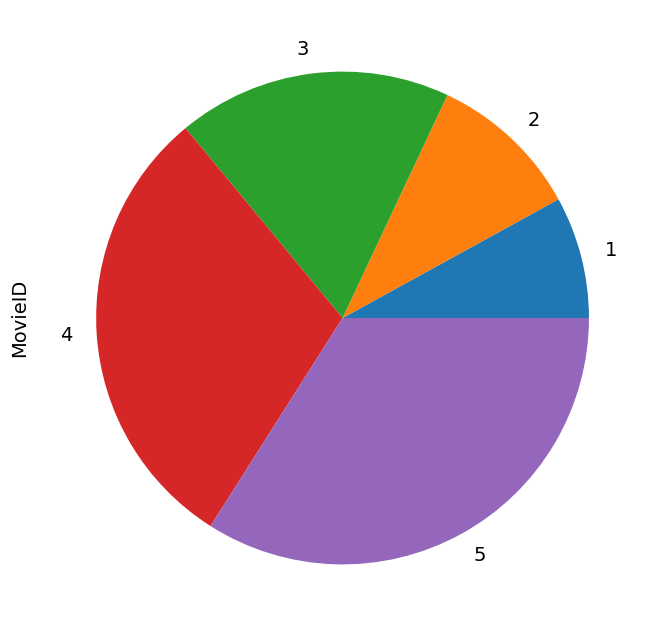

In [86]:
master_df[master_df['UserID'] == user_id].groupby('Rating')['MovieID'].count().plot(kind='pie',
                                                                                    figsize=(10, 8))

<Figure size 1500x1200 with 0 Axes>

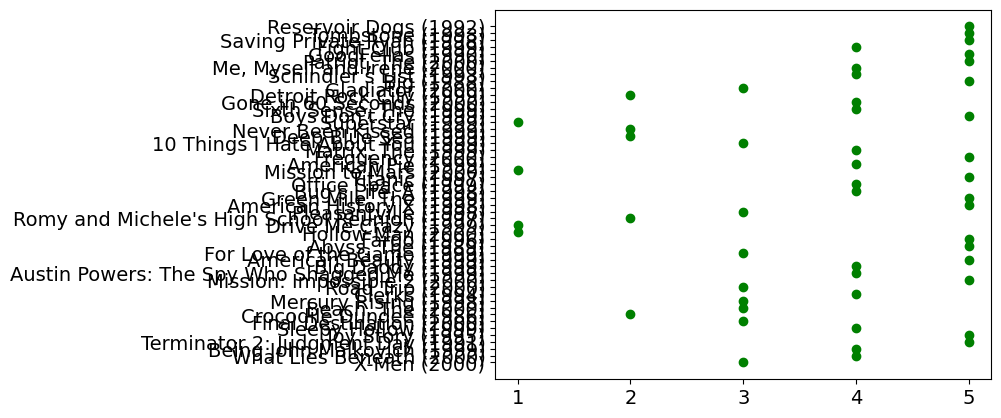

<Figure size 1500x1200 with 0 Axes>

In [89]:
plt.scatter(y=user_info.Title, x=user_info.Rating, color='g')
plt.figure(figsize=(15, 12))